In [172]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [173]:
std_df = pd.read_csv("F:\dataset_for_ML\supervised\student_performance_prediction\student_performance_prediction.csv")

In [174]:
temp_df = std_df.copy()

In [175]:
temp_df.shape

(40000, 7)

In [176]:
temp_df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [177]:
temp_df.isna().sum()/temp_df.shape[0]

Student ID                                     0.000000
Study Hours per Week                           0.049875
Attendance Rate                                0.049800
Previous Grades                                0.049850
Participation in Extracurricular Activities    0.050000
Parent Education Level                         0.050000
Passed                                         0.050000
dtype: float64

In [178]:
temp_df.duplicated().sum()

0

In [179]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [180]:
temp_df.select_dtypes(["float"]).describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [181]:
temp_df.shape

(40000, 7)

In [182]:
temp_df.dropna(inplace=True)

In [183]:
temp_df.shape

(29446, 7)

In [184]:
temp_df =  temp_df[(temp_df["Study Hours per Week"]>0) & (temp_df["Attendance Rate"] > 0)]


In [185]:
temp_df.shape

(28683, 7)

In [186]:
temp_df.select_dtypes(["float"]).describe(include="all")

,Study Hours per Week,Attendance Rate,Previous Grades
count,28683.000000,28683.000000,28683.000000
mean,10.277060,75.335777,65.414918
std,4.699371,20.377631,16.541461
min,0.100000,0.500000,8.300000
25%,6.900000,61.600000,55.000000
50%,10.100000,75.300000,65.200000
75%,13.500000,88.900000,75.200000
max,32.400000,150.200000,200.000000


In [187]:
temp_df.isna().sum()

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

In [188]:
temp_df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


<Axes: xlabel='Attendance Rate', ylabel='Previous Grades'>

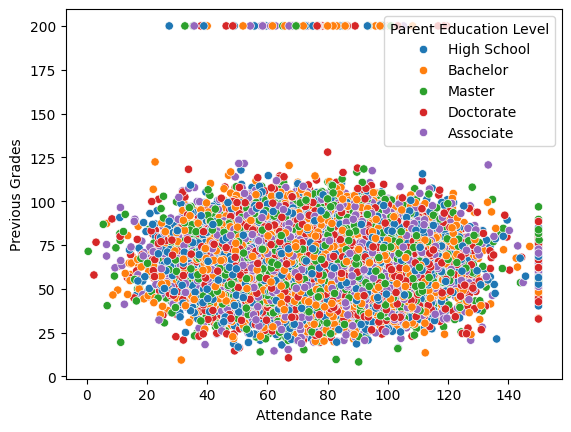

In [189]:
sns.scatterplot(data=temp_df,x='Attendance Rate',y='Previous Grades',hue="Parent Education Level")

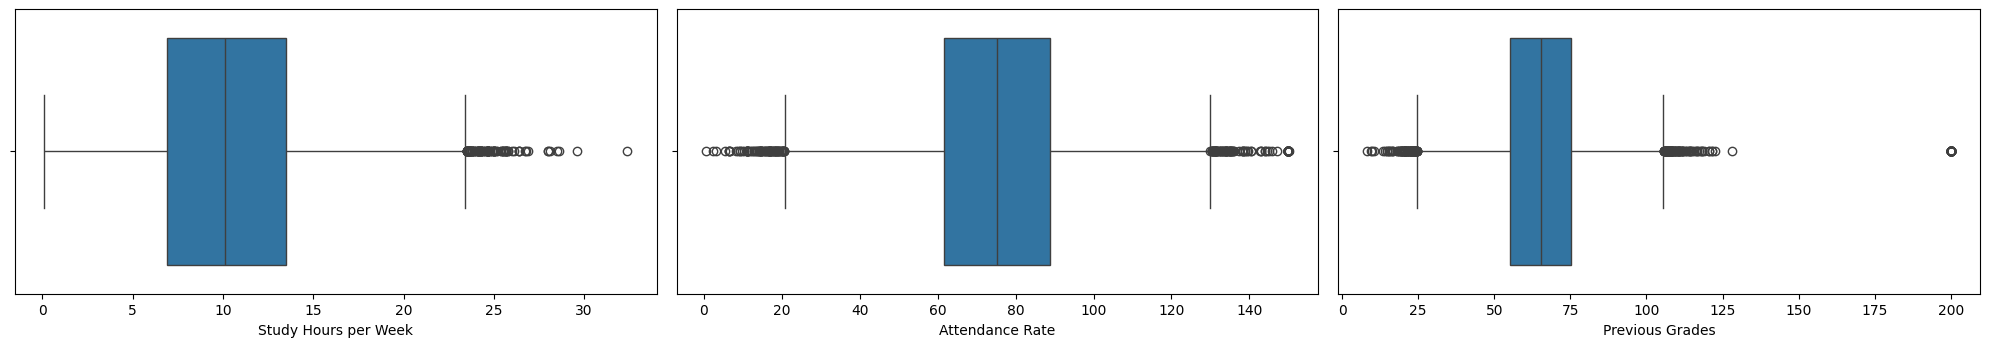

In [190]:
def boxplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.boxplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

boxplot(temp_df.select_dtypes(["float"]))

In [191]:
temp_df.shape

(28683, 7)

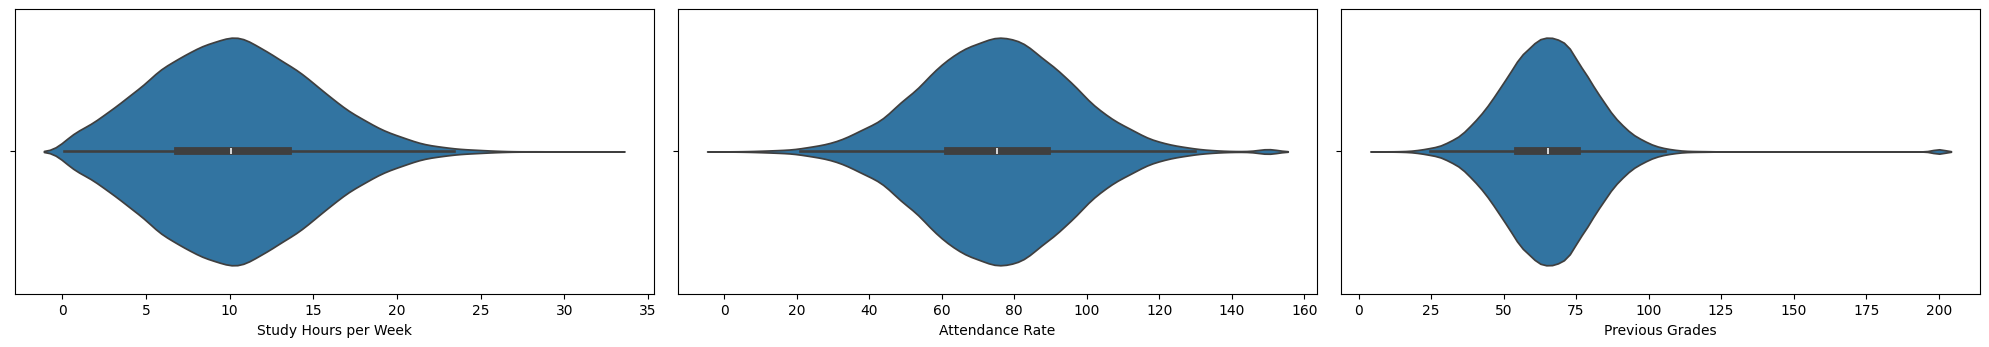

In [192]:
def violinplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.violinplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

violinplot(temp_df.select_dtypes(["float"]))

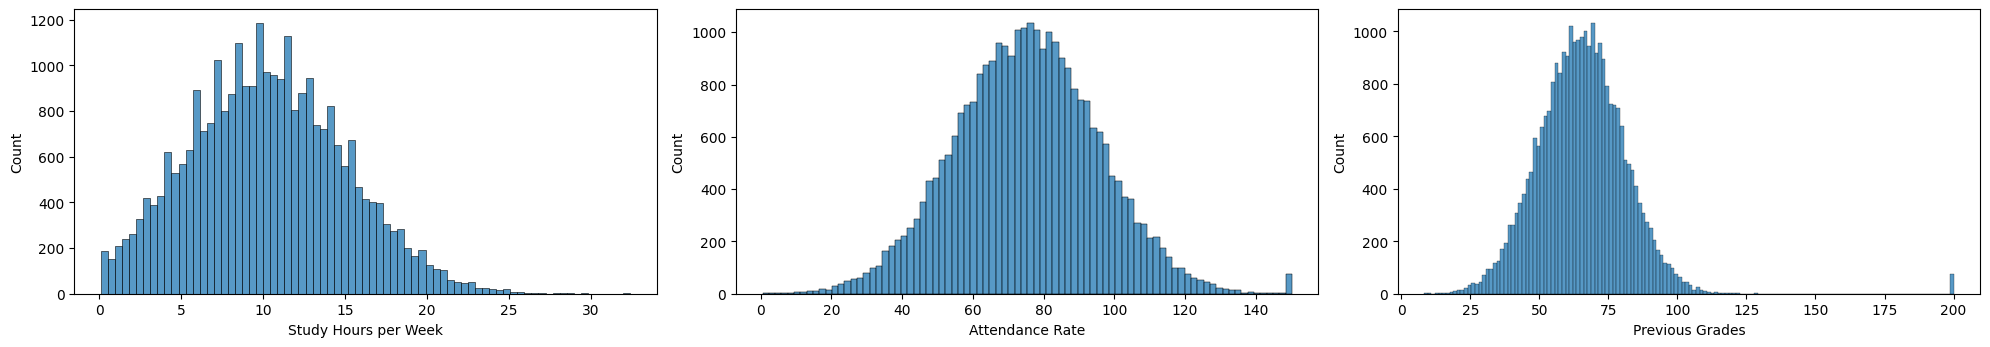

In [193]:
def histplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.histplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

histplot(temp_df.select_dtypes(["float"]))

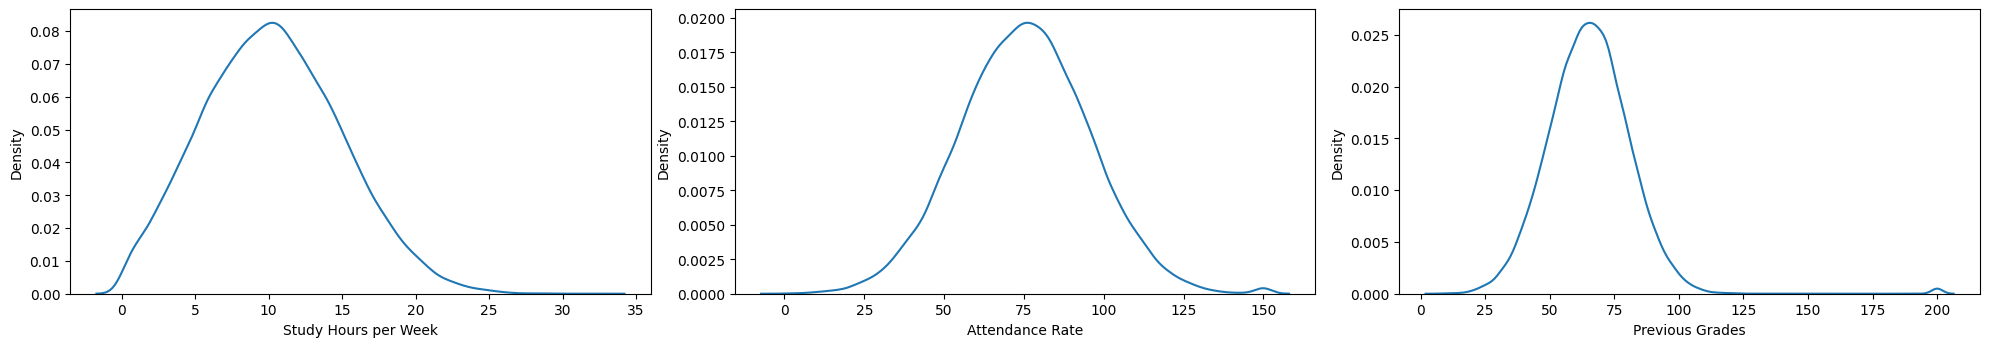

In [194]:
def kdeplot(selected_df):
    # print(selected_df)
    plt.figure(figsize=(20,10))
    for i,column in enumerate(selected_df.columns,1):
        # print(column)
        plt.subplot(3,3,i)
        sns.kdeplot(data=selected_df,x=column)
    plt.tight_layout()
    plt.show()

kdeplot(temp_df.select_dtypes(["float"]))

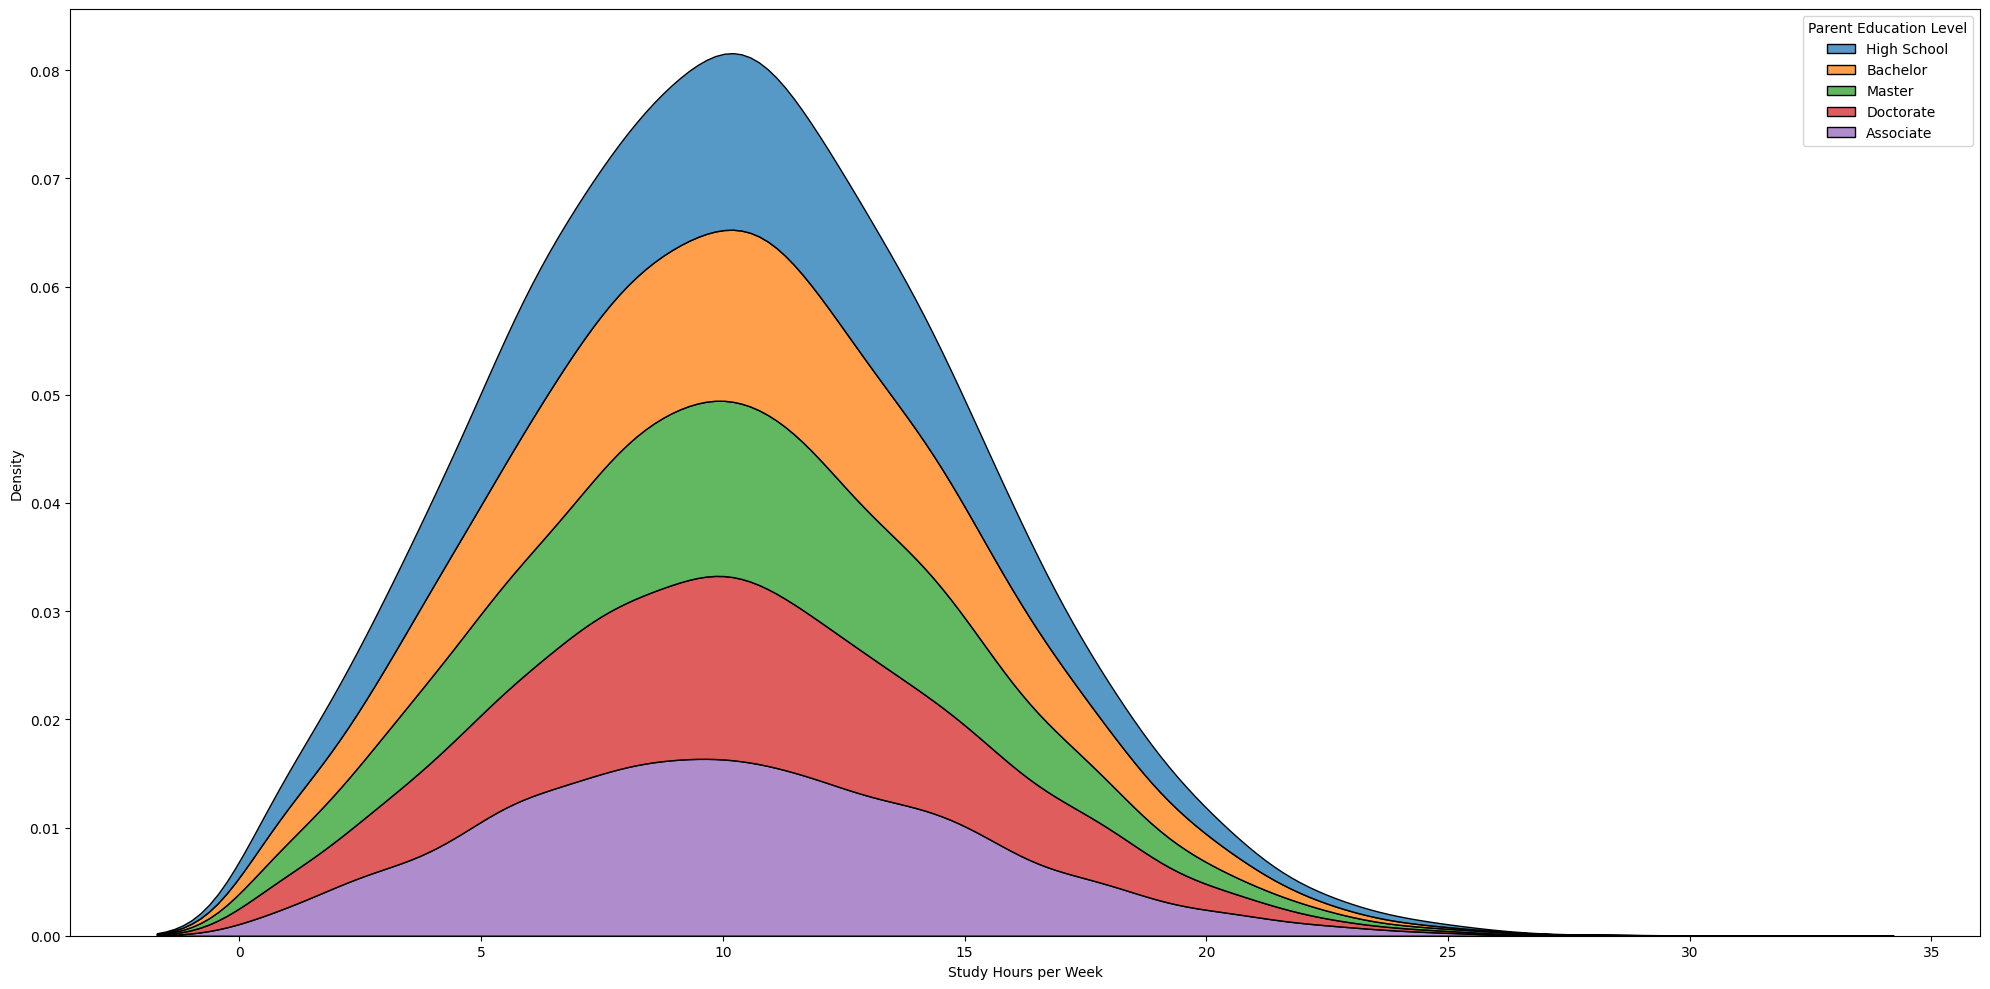

In [195]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=temp_df,x="Study Hours per Week",hue="Parent Education Level",multiple="stack")
plt.tight_layout()
plt.show()

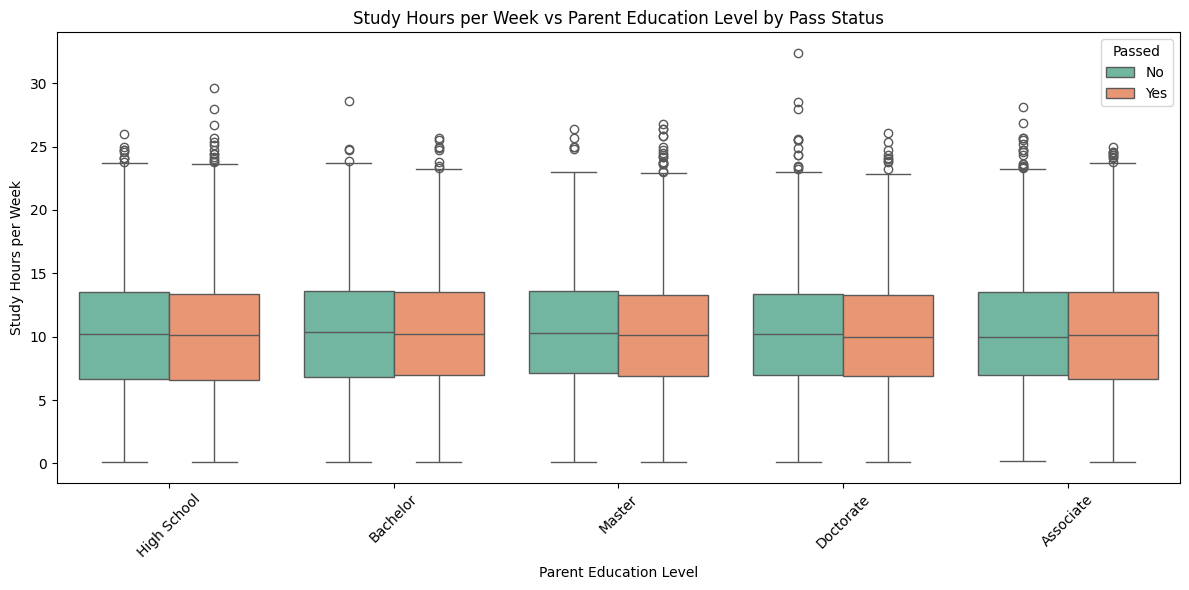

In [196]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=temp_df,
    x="Parent Education Level",
    y="Study Hours per Week",
    hue="Passed",
    palette="Set2"
)

# Add titles and rotate x-labels
plt.title("Study Hours per Week vs Parent Education Level by Pass Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

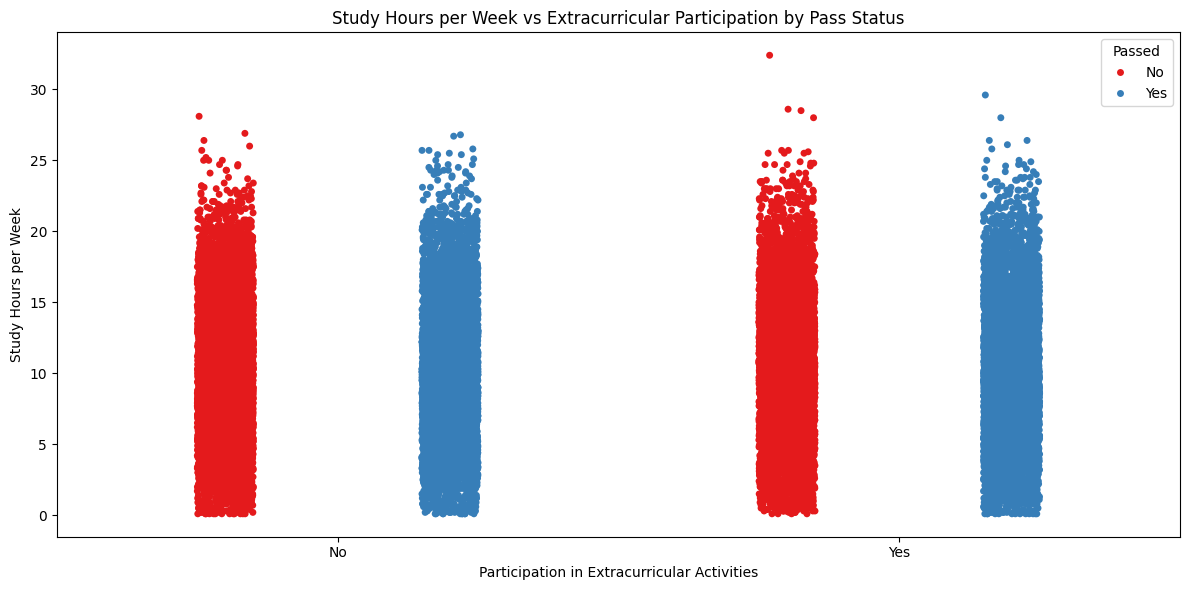

In [197]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=temp_df,
    x="Participation in Extracurricular Activities",
    y="Study Hours per Week",
    hue="Passed",
    dodge=True,
    palette="Set1",
    jitter=True
)

plt.title("Study Hours per Week vs Extracurricular Participation by Pass Status")
plt.tight_layout()
plt.show()

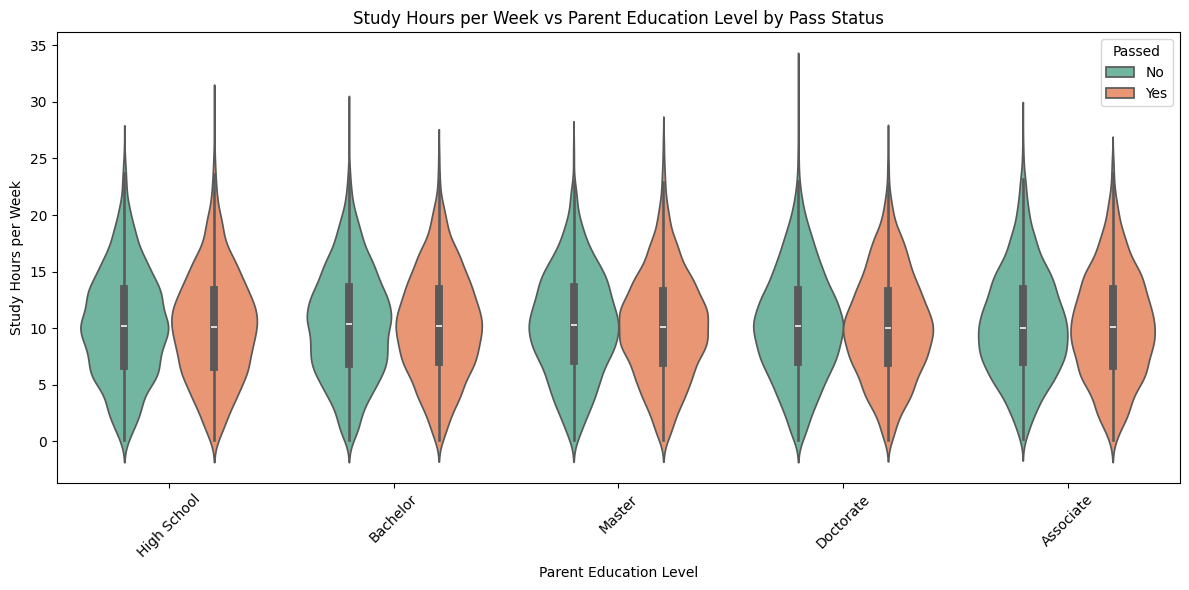

In [198]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=temp_df,
    x="Parent Education Level",
    y="Study Hours per Week",
    hue="Passed",
    palette="Set2"
)

# Add titles and rotate x-labels
plt.title("Study Hours per Week vs Parent Education Level by Pass Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [199]:
temp_df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,S00002,9.3,95.3,60.6,No,High School,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
5,S00006,8.8,73.8,69.3,Yes,High School,Yes
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes
...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No


In [200]:
def calculate_zscore(df):
    arr = np.array(df)
    z_score = (arr-arr.mean())/arr.std()
    return z_score


In [201]:
temp_df["study_hours_per_week_z_score"] = calculate_zscore(temp_df["Study Hours per Week"])

In [202]:
temp_df["attendance_rate_z_score"] = calculate_zscore(temp_df["Attendance Rate"])

In [203]:
temp_df["previous_grades_z_score"] = calculate_zscore(temp_df["Previous Grades"])

In [204]:
temp_df.sample(10)

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,study_hours_per_week_z_score,attendance_rate_z_score,previous_grades_z_score
34616,S34617,6.5,29.3,69.5,Yes,Associate,No,-0.803751,-2.259172,0.246964
14237,S14238,8.6,58.2,84.5,No,High School,Yes,-0.356875,-0.840926,1.153793
39386,S39387,1.7,74.3,76.3,No,High School,Yes,-1.825182,-0.050830,0.658060
3433,S03434,9.5,69.9,62.8,Yes,High School,No,-0.165357,-0.266757,-0.158085
30635,S30636,20.9,55.7,39.4,No,Associate,No,2.260542,-0.963611,-1.572737
30809,S30810,9.7,72.9,75.5,No,Bachelor,Yes,-0.122797,-0.119534,0.609696
8296,S08297,19.9,85.8,62.1,Yes,Doctorate,No,2.047744,0.513524,-0.200404
19139,S19140,22.0,94.6,84.2,Yes,Associate,No,2.494620,0.945378,1.135656
23041,S23042,11.9,102.1,71.3,No,Master,No,0.345359,1.313435,0.355784
5363,S05364,5.4,35.0,64.5,No,High School,No,-1.037829,-1.979449,-0.055312


In [205]:
temp_df = temp_df[
    (temp_df["study_hours_per_week_z_score"] >= -3) & 
    (temp_df["study_hours_per_week_z_score"] <= 3)
]

temp_df = temp_df[
    (temp_df["attendance_rate_z_score"] >= -3) & 
    (temp_df["attendance_rate_z_score"] <= 3)
]

temp_df = temp_df[
    (temp_df["previous_grades_z_score"] >= -3) & 
    (temp_df["previous_grades_z_score"] <= 3)
]

In [206]:
temp_df

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed,study_hours_per_week_z_score,attendance_rate_z_score,previous_grades_z_score
1,S00002,9.3,95.3,60.6,No,High School,No,-0.207916,0.979730,-0.291087
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No,1.558308,0.071856,-0.182267
4,S00005,8.8,89.3,72.7,No,Master,No,-0.314316,0.685284,0.440421
5,S00006,8.8,73.8,69.3,Yes,High School,Yes,-0.314316,-0.075367,0.234873
6,S00007,17.9,38.6,93.6,No,Doctorate,Yes,1.622148,-1.802782,1.703935
...,...,...,...,...,...,...,...,...,...,...
39994,S39995,5.1,92.1,46.1,Yes,Doctorate,No,-1.101669,0.822692,-1.167687
39995,S39996,15.6,93.8,51.4,Yes,Master,No,1.132712,0.906118,-0.847275
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes,0.217680,-0.438517,-0.073448
39997,S39998,13.1,65.6,38.1,No,Bachelor,No,0.600716,-0.477776,-1.651329


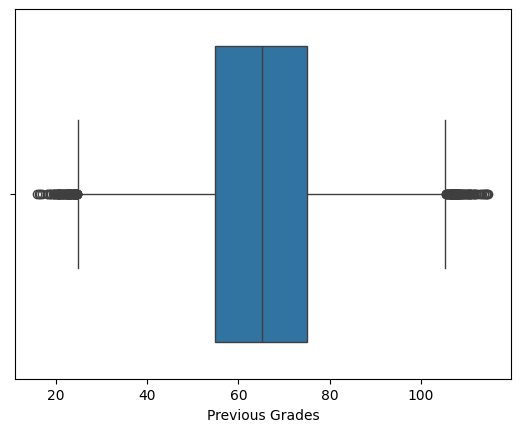

In [210]:
sns.boxplot(data=temp_df,x="Previous Grades")
plt.show()

In [211]:
###### filtered the dataset using z_score, now lets remove the z_score columns, as we do not have any use of it 

In [212]:
temp_df.drop(columns=["study_hours_per_week_z_score","attendance_rate_z_score","previous_grades_z_score"],inplace=True)

In [214]:
######### oh, lets drop studentID too ! 

In [218]:
temp_df.drop(columns="Student ID",inplace=True)

In [219]:
temp_df.head()

,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
1,9.3,95.3,60.6,No,High School,No
3,17.6,76.8,62.4,Yes,Bachelor,No
4,8.8,89.3,72.7,No,Master,No
5,8.8,73.8,69.3,Yes,High School,Yes
6,17.9,38.6,93.6,No,Doctorate,Yes


In [221]:
########## okayyyyyyyyyyyyyyyyyyyyyyy, lets encode our categorical data into numerical data. Such that our machine learning model can interpret the data !
########## we use one hot encoding for Participation column, ordinal encoder for Parent Education Level column because the order matters and label encoder for Passed column 

In [222]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
encoder = ColumnTransformer(
    transformers=[
        ("One Hot",OneHotEncoder(drop="first"),["Participation in Extracurricular Activities"]),
        
        ("Ordinal Encoder",OrdinalEncoder(),["Parent Education Level"]),
    ],remainder="passthrough"
)